In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as skl_lm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [2]:
advertising = pd.read_csv('advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<hr>
<b><font color='red'>Ejercicio 01</font></b>  

Hemos trabajado los datos para la TV, ajusta ahora los datos para la radio y los periodicos, pinta los puntos y la recta.
Haz que salgan tambien los diferentes parametros de ajuste, es decir el valor de $\beta_0$ , $\beta_1$ y R²

B0 (Intercepto): 9.311638095158283
B1 (Radio): 0.20249578339243965
R² (Radio): 0.33203245544529525


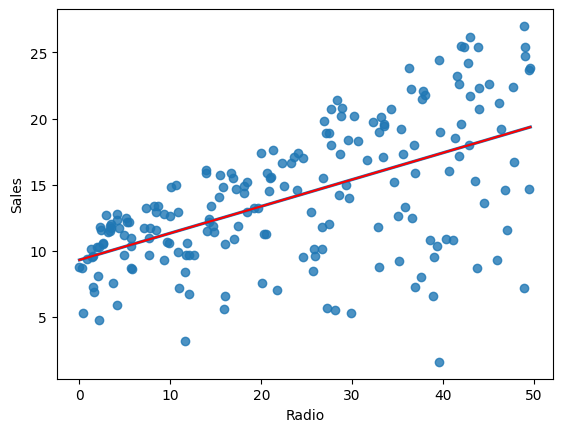

In [58]:
model_radio = skl_lm.LinearRegression()
model_radio.fit(advertising[['Radio']], advertising['Sales'])
B1_radio = model_radio.coef_[0]
B0_radio = model_radio.intercept_

y_pred_radio = model_radio.predict(advertising[['Radio']])
r_squared_radio = r2_score(advertising['Sales'], y_pred_radio)
print(f"B0 (Intercepto): {B0_radio}")
print(f"B1 (Radio): {B1_radio}")
print(f"R² (Radio): {r_squared_radio}")

sns.regplot(x=advertising.Radio, y=advertising.Sales, ci=None)
slope, intercept = np.polyfit(advertising.Radio, advertising.Sales, 1)
x_vals = np.linspace(advertising.Radio.min(), advertising.Radio.max(), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red')

B0 (Intercepto): 12.35140706927816
B1 (Periódicos): 0.05469309847227336
R² (Periódicos): 0.05212044544430516


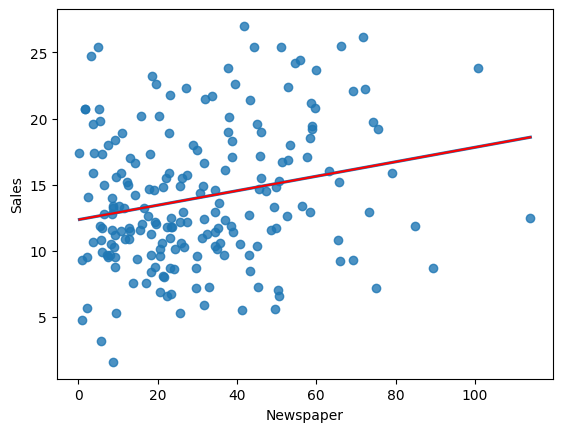

In [53]:
#para los periódicos
"""Esribe tu código aquí"""
model_newspaper = skl_lm.LinearRegression()
model_newspaper.fit(advertising[['Newspaper']], advertising['Sales'])
B1_newspaper = model_newspaper.coef_[0]
B0_newspaper = model_newspaper.intercept_
y_pred_newspaper = model_newspaper.predict(advertising[['Newspaper']])
r_squared_newspaper = r2_score( advertising['Sales'], y_pred_newspaper)
print(f"B0 (Intercepto): {B0_newspaper}")
print(f"B1 (Periódicos): {B1_newspaper}")
print(f"R² (Periódicos): {r_squared_newspaper}")

sns.regplot(x=advertising.Newspaper, y=advertising.Sales, ci=None)
slope, intercept = np.polyfit(advertising.Newspaper, advertising.Sales, 1)
x_vals = np.linspace(advertising.Newspaper.min(), advertising.Newspaper.max(), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red')
plt.show()

<hr>
<b><font color='red'>Ejercicio 02</font></b>  

Tratamos de predecir la temperatura a la que hierve el agua ( T ), conocida la presión atmosférica ( P ) en el lugar y momento en que hacemos el experimento.

Para ello, contamos con un conjunto de mediciones de ambas variables, con la temperatura en grados Fahrenheit y la presión en pulgadas de mercurio (sea lo que sea, es una unidad de medidad de presión). Por ejemplo, en un cierto punto de los Alpes, un cierto día, el barómetro marcaba 20.79 pulgadas de mercurio, y el agua hirvió a 194.5 grados Fahrenheit. Las mediciones se realizaron en el mismo lugar geográfico, pero en días distintos, con distintas condiciones atmosféricas y quizá incluso por personas distintas. En estas condiciones, es imposible que ningún modelo prediga con exactitud el valor de T en función de P, pero esperamos que lo haga con un margen de error moderado.

$$
\begin{array}{rrrrrrrrrr}
T&194.5 & 194.3 & 197.9 & 198.4 & 199.4 & 199.9 & 200.9 & 201.1 & 201.4 & 201.3 & 203.6 & 204.6 & 209.5 & 208.6 & 210.7 & 211.9 & 212.2\\
P &20.79&  20.79&  22.4 &  22.67&  23.15&  23.35&  23.89&  23.99& 24.02&  24.01&  25.14&  26.57&  28.49&  27.76&  29.04&  29.88& 30.06
\end{array}
$$

 - Ajusta un modelo lineal a estos datos
 - Calcula el valor de $R^2$ del ajuste
 - Usa el modelo para predecir la temperatura de ebullición del agua cuando la presión es de 26 "pulgadas de mercurio".

In [22]:
datos = np.array(
        [(20.79,194.50),(20.79,194.30),(22.40,197.90),(22.67,198.40),
         (23.15,199.40),(23.35,199.90),(23.89,200.90),(23.99,201.10),
         (24.02,201.40),(24.01,201.30),(25.14,203.60),(26.57,204.60),
         (28.49,209.50),(27.76,208.60),(29.04,210.70),(29.88,211.90),
         (30.06,212.20)])

In [25]:
"""Esribe tu código aquí"""
presion = datos[:, 0].reshape(-1, 1)
temperatura = datos[:, 1]

modelo_lineal =skl_lm.LinearRegression()
modelo_lineal.fit(presion, temperatura)

temperatura_predicha = modelo_lineal.predict(presion)
r_squared = r2_score(temperatura, temperatura_predicha)

print(f"Coeficiente B1 (pendiente): {modelo_lineal.coef_[0]:.4f}")
print(f"Coeficiente B0 (intercepto): {modelo_lineal.intercept_:.4f}")
print(f"R² del ajuste: {r_squared:.4f}")

presion_nueva = np.array([[26]])
temperatura_predicha_nueva = modelo_lineal.predict(presion_nueva)
print(f"Predicción: {temperatura_predicha_nueva[0]:.2f}")

Coeficiente B1 (pendiente): 1.9018
Coeficiente B0 (intercepto): 155.2965
R² del ajuste: 0.9944
Predicción: 204.74


<hr>
<b><font color='red'>Ejercicio 03</font></b>  

Coeficiente B1 (pendiente): 0.2189
Coeficiente B0 (intercepto): 11.5459
R² del ajuste: 0.4178


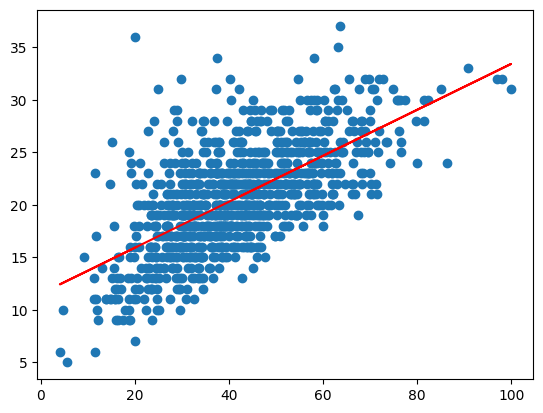

In [42]:
#Utliza el archivo super.cvs
#Haz un ajuste por mínimos cuadrados del número de articulos respecto al precio
"""Esribe tu código aquí"""
archivo_csv = "../10_Pandas/super.csv" 
datos = pd.read_csv(archivo_csv)

precio = datos['precio'].values.reshape(-1, 1)
num_articulos = datos['número de artículos'].values  

modelo_lineal =skl_lm.LinearRegression()
modelo_lineal.fit(precio, num_articulos)

B1 = modelo_lineal.coef_[0]
B0 = modelo_lineal.intercept_

r_squared = modelo_lineal.score(precio, num_articulos)

print(f"Coeficiente B1 (pendiente): {B1:.4f}")
print(f"Coeficiente B0 (intercepto): {B0:.4f}")
print(f"R² del ajuste: {r_squared:.4f}")

plt.scatter(precio, num_articulos)
plt.plot(precio, modelo_lineal.predict(precio), color='red')
plt.show()

In [59]:
#¿En el caso de que una persona comprase 40 artículos cual sereía la estimación del precio utilizando el valor medio y el modelo que has utilizado ?
"""Esribe tu código aquí"""
valor_medio_precio = datos['precio'].mean()
estimacion_precio_valor_medio = valor_medio_precio * 40
estimacion_precio_modelo = modelo_lineal.predict(np.array([[40]]))[0]
print(f"Estimación valor medio: {estimacion_precio_valor_medio:.2f}")
print(f"Estimación con modelo de regresión lineal: {estimacion_precio_modelo:.2f}")


Estimación valor medio: 1666.37
Estimación con modelo de regresión lineal: 20.30
